## Demo (and testing)

### Until this is a proper package, add src to path

In [1]:
# ensure notebook can import from local sticky directory
import sys
sys.path.append("D:/Projects/lazychart/src")

### Object oriented vs Functional appraoch

There are two ways to use this package:

1. Object oriented approach. You instantiate one or more instances of the StickyPlotter class and use them to control your plotting.

```python
# object oriented approach
from lazychart import ChartMonkey
cm = ChartMonkey()
cm.bar(data=df, x='x_col')
```

2. Functional approach. You call the package functions which are defined in the \_\_init__.py file which instantiates the StickyPlotter class and passes your requests through for it to handle.

```python
# functional approach
from lazychart import bar
bar(data=df, x='x_col')
```

In [2]:
from lazychart import ChartMonkey
cm = ChartMonkey()

### Generate some data

In [3]:
# object oriented approach
df = cm.example_data(n=1461)
df.head()

,date,user,sleep_hours,steps,alcohol,work_stress,nutrition,score,predicted_emotion,month,weekday
0,2021-08-15 23:42:58.289052,user39,6.651987,5688.783716,2,2.313749,5.068314,8.593897,Happy,2021-08,Sunday
1,2021-08-16 23:42:58.289052,user29,7.198558,6942.937849,3,4.208799,8.146145,9.696701,Happy,2021-08,Monday
2,2021-08-17 23:42:58.289052,user15,5.565635,4095.907190,0,9.476706,7.504157,3.874251,Happy,2021-08,Tuesday
3,2021-08-18 23:42:58.289052,user43,7.581022,4956.492933,3,3.122092,10.000000,7.801262,Happy,2021-08,Wednesday
4,2021-08-19 23:42:58.289052,user8,5.475985,4373.712913,2,3.138230,7.752243,7.591253,Happy,2021-08,Thursday


data generation notes/ideas
* try to balance out the predicted_emotion class, currently 100% happy
* make people sleep more on the weekends

library ideas
* custom sort order as list of values e.g. ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
* make the sort asc/desc default based on the sort type (values descending, labels ascending)

### Legends

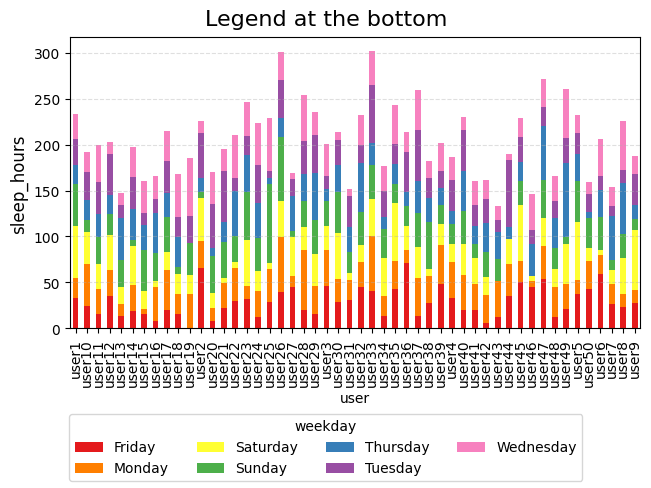

In [4]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend at the bottom', stacking='standard', legend='bottom')

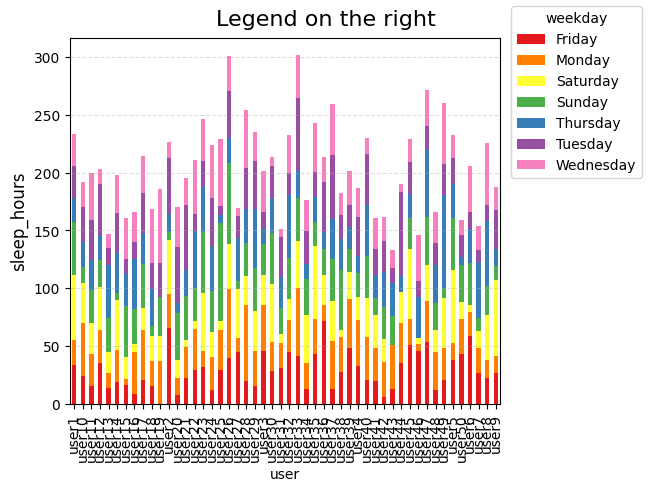

In [5]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend on the right', stacking='standard', legend='right')

In [6]:
### Long legend labels

weekday_mapping = {
    "Monday":    "Monday is the first day",
    "Tuesday":   "Tuesday is the second day",
    "Wednesday": "Wednesday is the third day",
    "Thursday":  "Thursday is the fourth day",
    "Friday":    "Friday is the fifth day",
    "Saturday":  "Saturday is the sixth day",
    "Sunday":    "Sunday is the seventh day"
}

# Apply mapping to create longer names
df['weekday_long'] = df['weekday'].map(weekday_mapping)

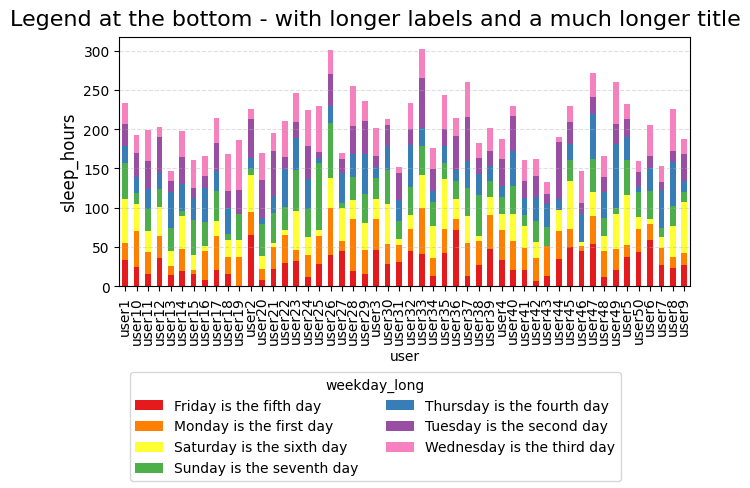

In [7]:
# legend on bottom
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday_long', title='Legend at the bottom - with longer labels and a much longer title', stacking='standard', legend='bottom')

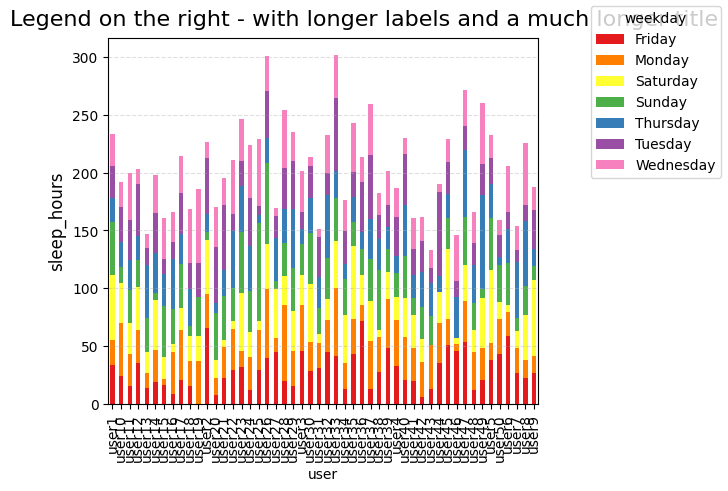

In [8]:
# legend on the right
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Legend on the right - with longer labels and a much longer title', stacking='standard', legend='right')

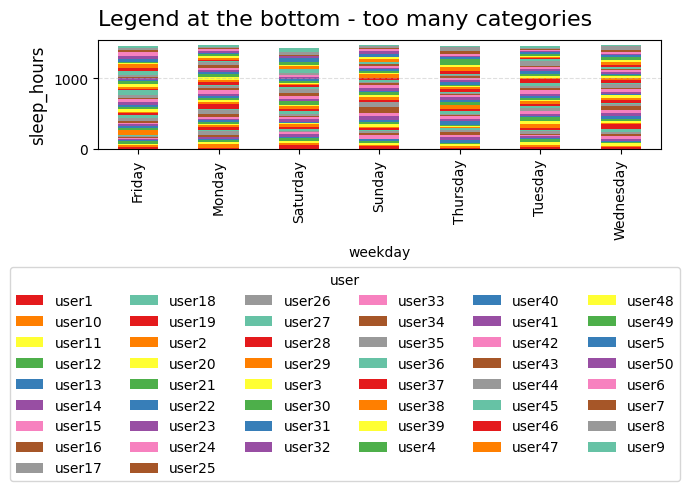

In [9]:
# legend on bottom
cm.bar(data=df, x='weekday', y='sleep_hours', group_by='user', title='Legend at the bottom - too many categories', stacking='standard', legend='bottom')

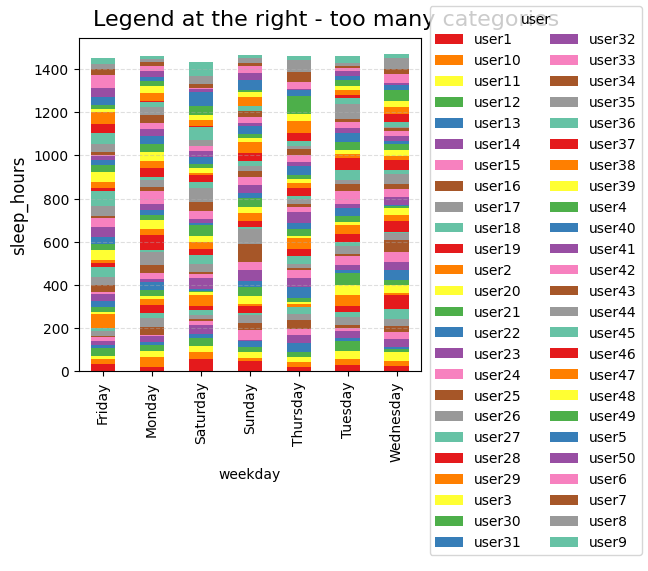

In [10]:
# legend on the right
cm.bar(data=df, x='weekday', y='sleep_hours', group_by='user', title='Legend at the right - too many categories', stacking='standard', legend='right')

### Automatic aggregation on the x axis

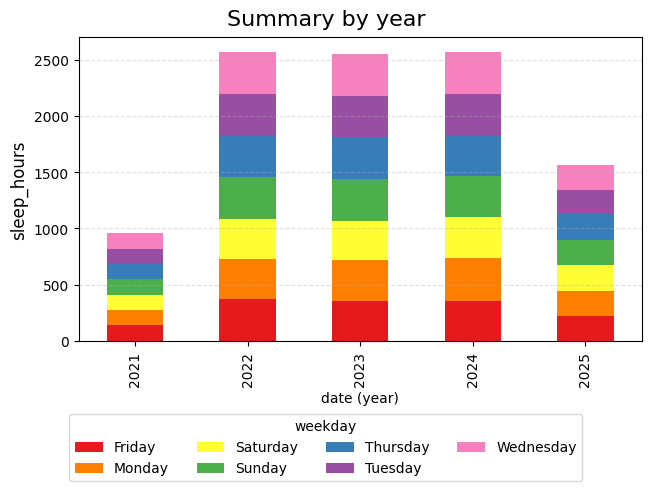

In [11]:
cm.bar(data=df, x='date', x_period='year', y='sleep_hours', group_by='weekday', title='Summary by year', stacking='standard', legend='bottom')

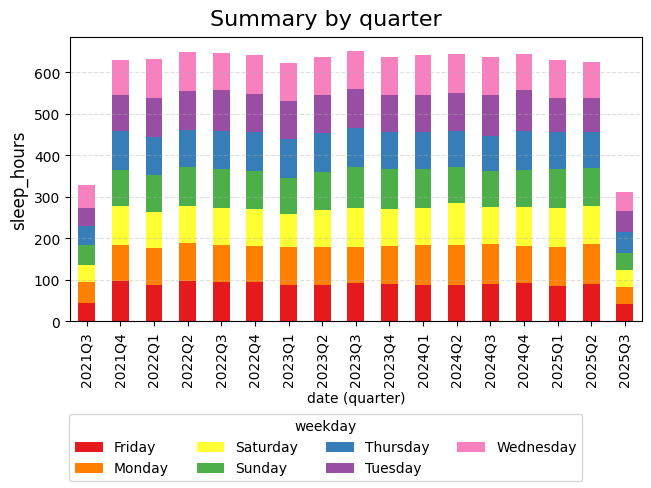

In [12]:
cm.bar(data=df, x='date', x_period='quarter', y='sleep_hours', group_by='weekday', title='Summary by quarter', stacking='standard', legend='bottom')

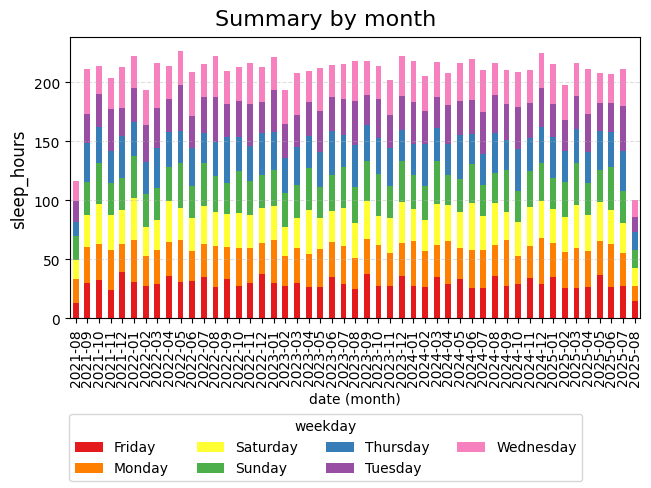

In [13]:
cm.bar(data=df, x='date', x_period='month', y='sleep_hours', group_by='weekday', title='Summary by month', stacking='standard', legend='bottom')

### Custom sort order

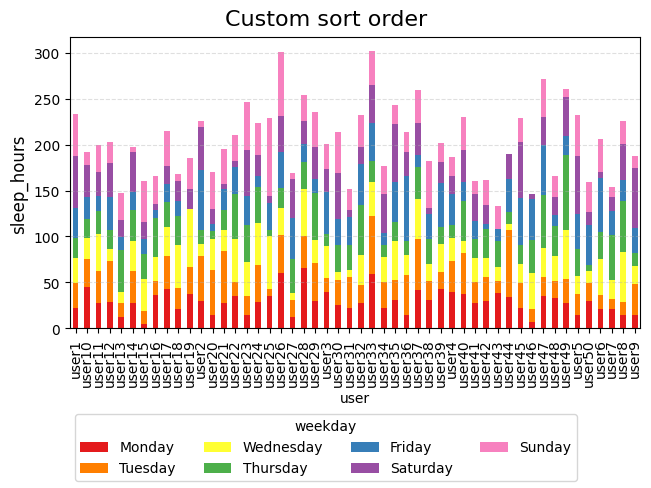

In [20]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Custom sort order', stacking='standard', legend='bottom', sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

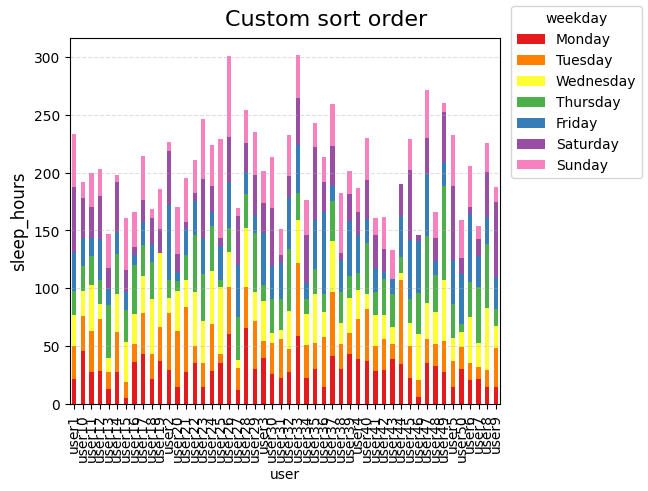

In [21]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', title='Custom sort order', stacking='standard', legend='right', sort_group_by=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

### Sticky arguments

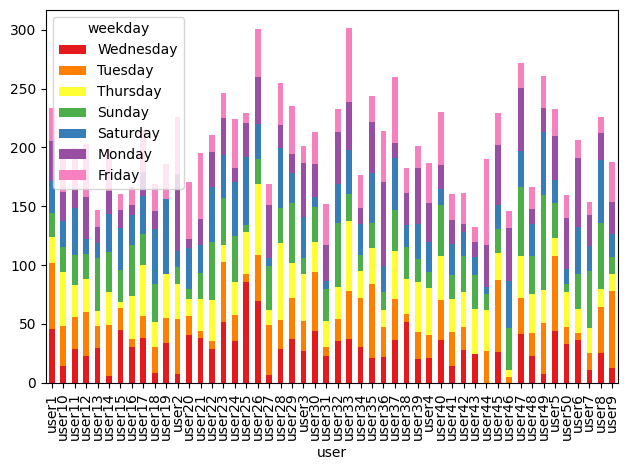

In [4]:
cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard', sort_x_by='label', sort_x_desc=False, sticky=True)

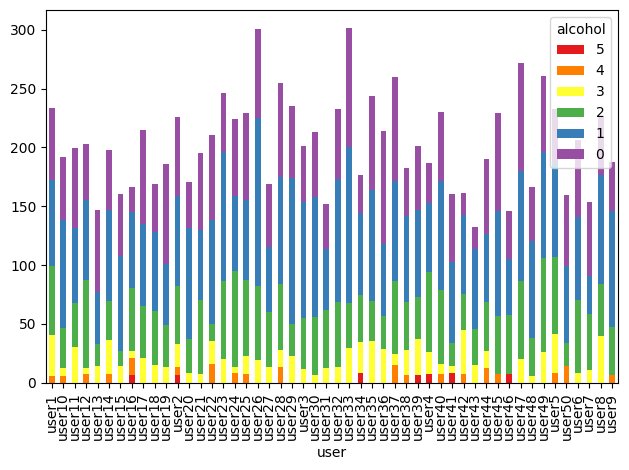

In [5]:
# no need to pass data, x, y etc
cm.bar(group_by='alcohol', sort_group_by='label')

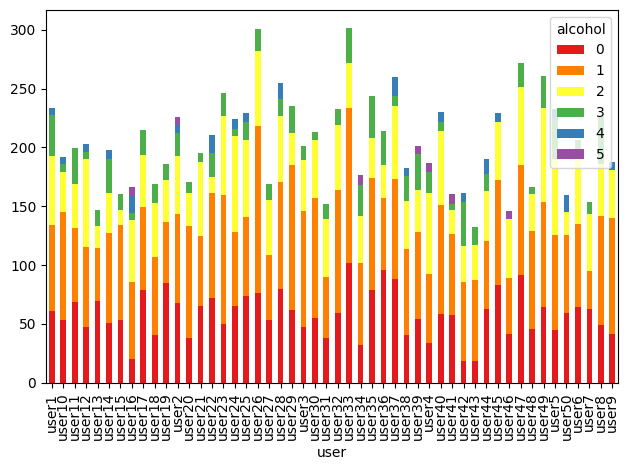

In [6]:
cm.bar(group_by='alcohol', sort_group_by='label', sort_group_desc=False)

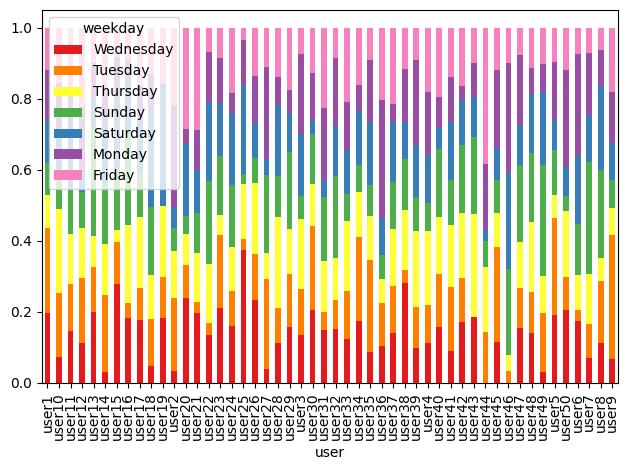

In [8]:
cm.bar(stacking='proportion')

### Colorblind or custom palettes

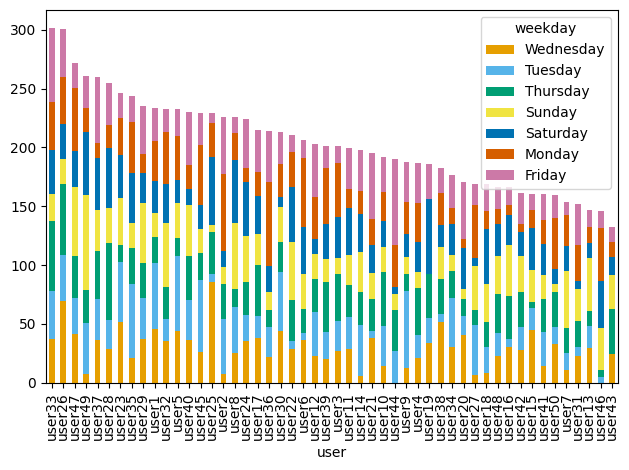

In [12]:
colorblind_cm = ChartMonkey(palette='colorblind')
colorblind_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

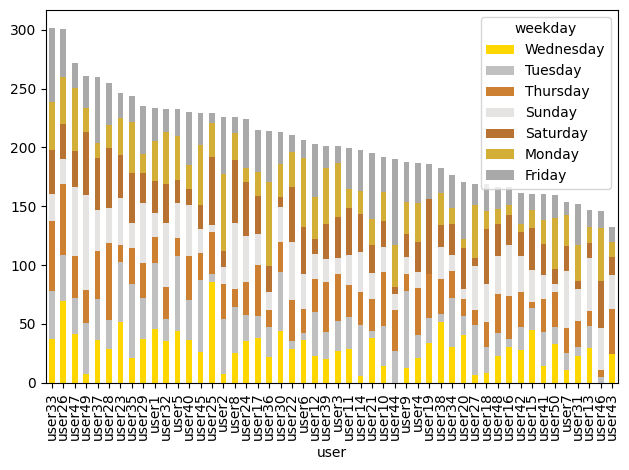

In [13]:
METALLIC_PALETTE = [
    '#FFD700',  # Gold
    '#C0C0C0',  # Silver
    '#CD7F32',  # Bronze
    '#E5E4E2',  # Platinum
    '#B87333',  # Copper
    '#D4AF37',  # Metallic Gold (Deep)
    '#A9A9A9',  # Gunmetal Gray
    '#B0C4DE',  # Steel Blue
    '#DA8A67',  # Rose Gold
    '#8C7853'   # Brass
]
custom_cm = ChartMonkey(palette=METALLIC_PALETTE)
custom_cm.bar(data=df, x='user', y='sleep_hours', group_by='weekday', stacking='standard')

In [ ]:
# functional approach
from lazychart import bar
bar(data=df, x='month', y='nutrition', aggfunc='mean', sort_x_by='label')

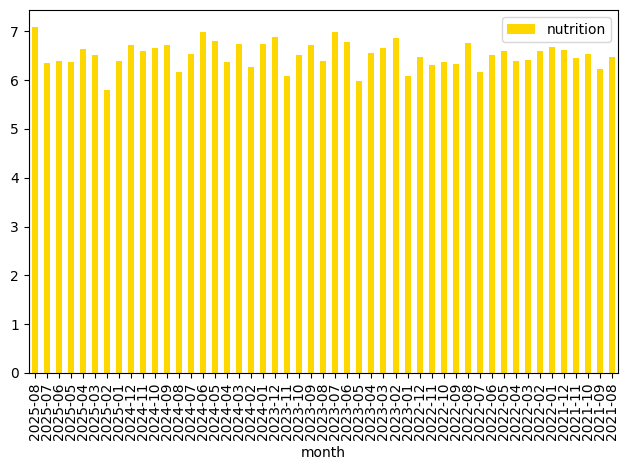

In [17]:
# investigate - tooltip not coming up
bar(data=df, x='month', y='nutrition', aggfunc='mean', sort_x_by='label')

# Early stuff - need to revisit

### Post processing

The default behaviour is to show the plot and return None to suppress other cell outputs. Pass show_plot=False to instead return fig, ax for post processing.

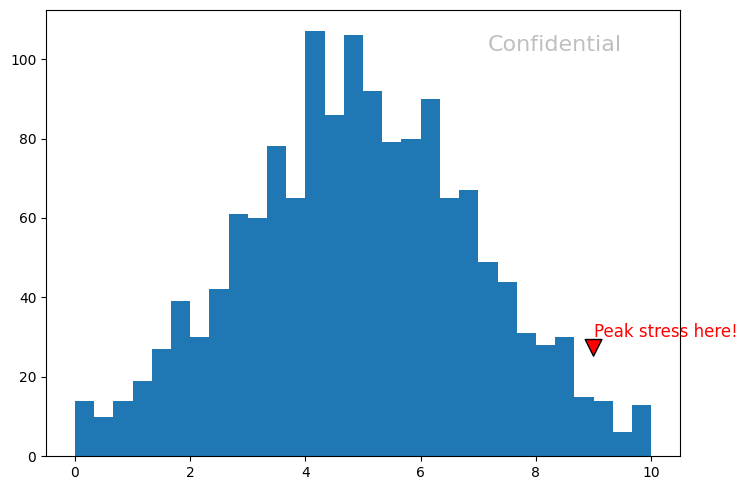

In [9]:
fig, ax = sticky.hist(data=df, x='work_stress', show_plot=False)

# Example: Add a custom annotation to the plot
ax.annotate(
    'Peak stress here!',
    xy=(9, 25), # point to annotate (arrow tip), in data coordinates
    xytext=(9, 30), # location of the annotation text, in data coordinates
    arrowprops=dict(facecolor='red', shrink=0.05), # arrow style
    fontsize=12, color='red' # text style
)

# Example: Add a watermark
fig.text(0.8, 0.9, 'Confidential', ha='center', va='center', fontsize=16, color='gray', alpha=0.5)

# Example: Save the figure with a custom DPI and tight bounding box
fig.savefig('demo_save.png', dpi=300, bbox_inches='tight')